In [1]:
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [2]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format="{:,.2f}".format

In [4]:
#Loading the dataset
df = pd.read_csv("data/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [5]:
#Dropping the columns that do not add value
df = df.drop(df.columns[0:3], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [6]:
df.shape

(10000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature Geography contains 3  distinct values 
The feature Gender contains 2  distinct values 


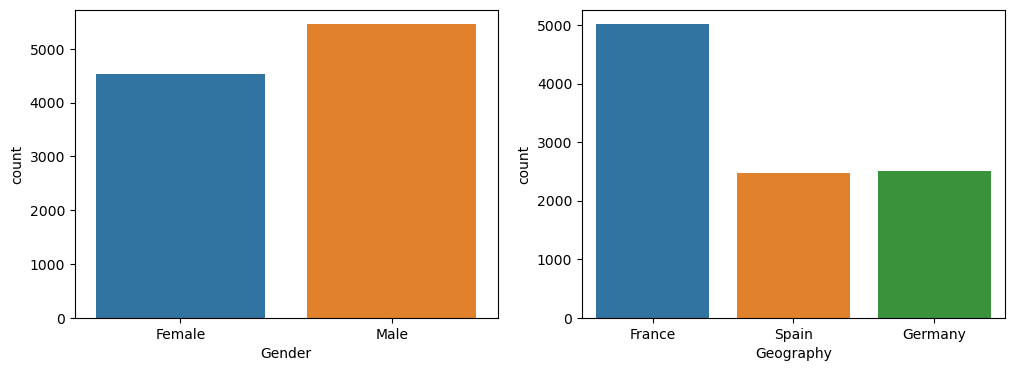

In [9]:
#Analyzing the distributions of the categorical features

f,axes=plt.subplots(1,2,figsize=(12,4))

sns.countplot(df["Gender"],ax=axes[0]);
sns.countplot(df['Geography'],ax=axes[1]);

In [10]:
#Creating new features with the help of get_dummies

for column in categorical:
    nuevas_features = pd.get_dummies(df[column])
    df= pd.merge(
        left=df,
        right=nuevas_features,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,0,1,1,0


In [12]:
#Defining X and y
X=df.drop(columns=["Exited"])
y=df[["Exited"]]

In [13]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

Exited
0        79.63
1        20.37
dtype: float64

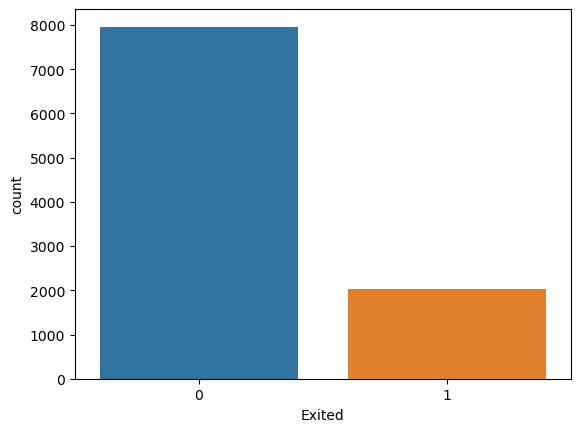

In [14]:
sns.countplot(data=df,x="Exited");

In [15]:
#Managing the imbalanced classes with imblearn

from imblearn.combine import SMOTEENN

imp=SMOTEENN(sampling_strategy=0.99)

X_bal,y_bal=imp.fit_resample(X,y)

#Finding out if the imbalaced data continues

y_bal.value_counts(normalize=True)*100

Exited
1        55.28
0        44.72
dtype: float64

In [16]:
#Saving the new data in order to save time in the future analysis

new_data=pd.concat([X_bal,y_bal],axis=1)

new_data.to_csv("new_data_churn_lab_platzi.csv",index=False)

In [17]:
#Splitting the data in train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3, random_state=42)

In [18]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [19]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

#Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb

estimators=[("lr",LogisticRegression(solver="lbfgs",max_iter=10000)),("knn",KNeighborsClassifier(5)),("rfc",RandomForestClassifier())]

In [64]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000)))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
# models.append(("SVM",SVC(gamma="auto")))
models.append(("KNN",KNeighborsClassifier()))
models.append(("XGBClassifier",XGBClassifier(objective="binary:logistic")))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))
models.append(("Voting Classifier",VotingClassifier(estimators)))
models.append(("Average Voting Classifier",VotingClassifier(estimators,voting="soft")))


#Evaluating each model in turn
results=[]
names=[]
scoring="accuracy"
scaler=StandardScaler()

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :85.21% (1.36%)
LDA :84.81% (1.34%)
Naive Bayes :80.63% (1.64%)
KNN :86.10% (1.27%)
XGBClassifier :90.39% (1.34%)
Decision Tree :83.94% (1.12%)
Random Forest :89.79% (1.19%)
Bagging Class :87.61% (2.44%)
Extra trees :89.73% (1.54%)
Ada Boost :87.81% (0.92%)
Gradient Boosting :88.61% (1.08%)
Voting Classifier :88.12% (1.07%)
Average Voting Classifier :88.06% (1.21%)


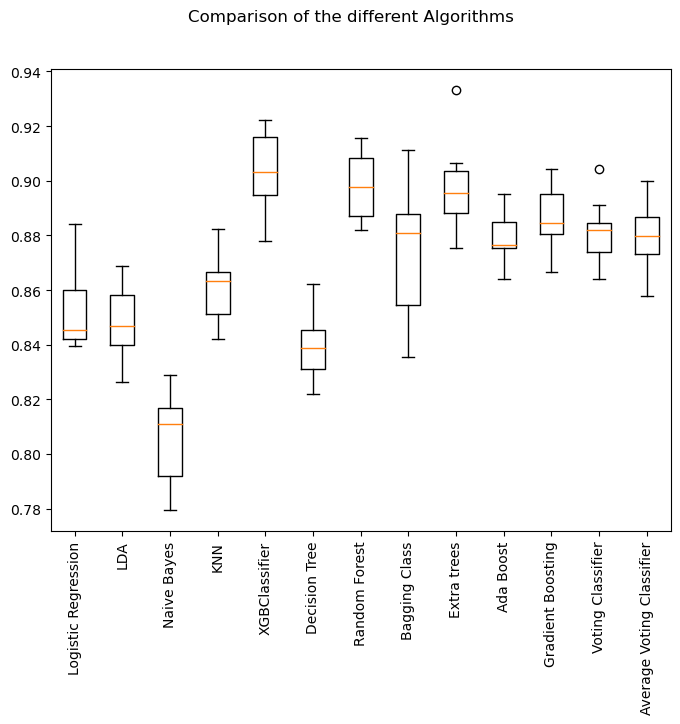

In [67]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[8,10]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [43]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV


parametros = {
    'n_estimators': range(5,20),
    'max_depth': range(2, 12)
}
  
model=XGBClassifier(objective="binary:logistic")

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train,(y_train.values.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.892348 using the params {'max_depth': 7, 'n_estimators': 19}
0.829180 (0.005817) with {'max_depth': 2, 'n_estimators': 5}
0.839190 (0.009250) with {'max_depth': 2, 'n_estimators': 6}
0.846750 (0.014139) with {'max_depth': 2, 'n_estimators': 7}
0.850533 (0.010648) with {'max_depth': 2, 'n_estimators': 8}
0.853868 (0.005478) with {'max_depth': 2, 'n_estimators': 9}
0.855423 (0.009724) with {'max_depth': 2, 'n_estimators': 10}
0.856537 (0.006417) with {'max_depth': 2, 'n_estimators': 11}
0.859873 (0.006100) with {'max_depth': 2, 'n_estimators': 12}
0.860095 (0.007132) with {'max_depth': 2, 'n_estimators': 13}
0.863654 (0.006592) with {'max_depth': 2, 'n_estimators': 14}
0.866546 (0.008930) with {'max_depth': 2, 'n_estimators': 15}
0.866991 (0.008370) with {'max_depth': 2, 'n_estimators': 16}
0.867213 (0.006548) with {'max_depth': 2, 'n_estimators': 17}
0.867213 (0.009918) with {'max_depth': 2, 'n_estimators': 18}
0.868993 (0.007810) with {'max_depth': 2, 'n_estimators': 19}
0.851

In [44]:
results=pd.DataFrame(list(zip(means,stds,params)))
results.columns=["Accuracy","Std","Parameters"]
results

,Accuracy,Std,Parameters
0,0.83,0.01,"{'max_depth': 2, 'n_estimators': 5}"
1,0.84,0.01,"{'max_depth': 2, 'n_estimators': 6}"
2,0.85,0.01,"{'max_depth': 2, 'n_estimators': 7}"
3,0.85,0.01,"{'max_depth': 2, 'n_estimators': 8}"
4,0.85,0.01,"{'max_depth': 2, 'n_estimators': 9}"
...,...,...,...
145,0.89,0.01,"{'max_depth': 11, 'n_estimators': 15}"
146,0.88,0.01,"{'max_depth': 11, 'n_estimators': 16}"
147,0.89,0.01,"{'max_depth': 11, 'n_estimators': 17}"
148,0.89,0.01,"{'max_depth': 11, 'n_estimators': 18}"


In [45]:
#Playing with CV in XGBoost

from xgboost import cv

from xgboost import DMatrix

matrix=DMatrix(X_train,y_train)

params = {"objective":"binary:logistic", "max_depth":3}


# Perform cross-validation: cv_results
cv_results = cv(dtrain=matrix, params=params, 
                  nfold=3, num_boost_round=10, 
                  metrics="auc", as_pandas=True, seed=123)


# Print cv_results
print(cv_results)

print("*"*20)

# Print the AUC
print("ROC_AUC with XGBoostCV")
print(((cv_results["test-auc-mean"].iloc[-1])))

print("*"*20)

#CV with sk-learn
cv_sklearn=cross_val_score(XGBClassifier(objective="binary:logistic",max_depth=3),X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring="roc_auc").mean()

print("ROC_AUC with sk-learn",cv_sklearn)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0            0.85           0.01           0.83          0.01
1            0.88           0.01           0.87          0.01
2            0.92           0.00           0.91          0.01
3            0.92           0.00           0.92          0.01
4            0.93           0.00           0.92          0.01
5            0.94           0.00           0.93          0.01
6            0.94           0.00           0.93          0.00
7            0.95           0.00           0.94          0.01
8            0.95           0.00           0.94          0.01
9            0.95           0.00           0.94          0.01
********************
ROC_AUC with XGBoostCV
0.939541415631122
********************
ROC_AUC with sk-learn 0.9616033045560165


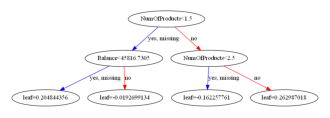

<Figure size 1000x600 with 0 Axes>

In [46]:
# Create the DMatrix: housing_dmatrix
matrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"binary:logistic", "max_depth":2}

# Train the model: xg_reg
xg_cla = xgb.train(params=params, dtrain=matrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_cla,num_trees=9)
plt.figure(figsize=(10,6))
plt.show();


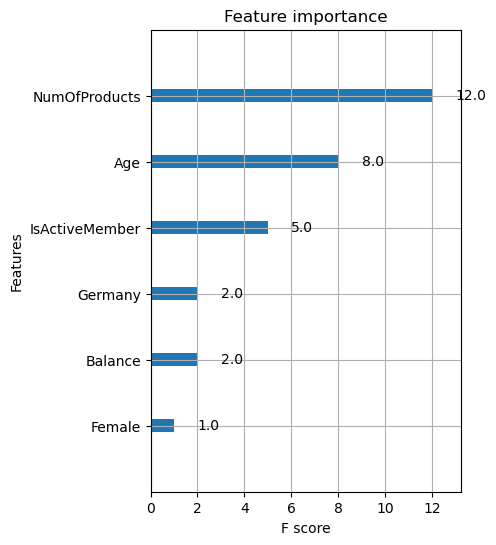

In [47]:
# Plot the feature importances
xgb.plot_importance(xg_cla)
plt.rcParams["figure.figsize"]=[5,2]
plt.show()

In [48]:
#Saving the fine_tuned model
from pickle import dump
dump(grid_result,open("Models_Jupyter_Notebook/tune_model_lab_platzi.pkl","wb"))

In [49]:
#Saving the scaler
from pickle import dump
dump(scaler_x,open("Models_Jupyter_Notebook/scaler_x.pkl","wb"))

In [50]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")
print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       866
           1       0.92      0.89      0.90      1062

    accuracy                           0.89      1928
   macro avg       0.89      0.89      0.89      1928
weighted avg       0.89      0.89      0.89      1928



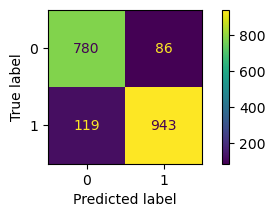

In [51]:
#Evaluating the model with a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_result,X_test,y_test.values.reshape(-1,1).ravel());

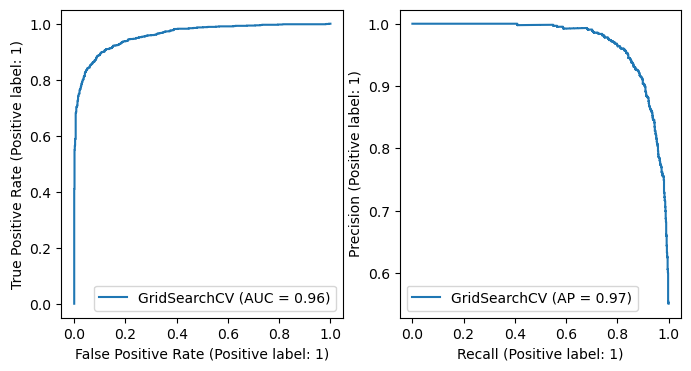

In [52]:
#Using precision_recall curve and roc_curve

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

fig,ax=plt.subplots(1,2,figsize=(8,4));

plot_roc_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[0]);

plot_precision_recall_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[1]);

In [25]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [26]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [28]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
225/225 [==============================] - 3s 6ms/step - loss: 0.3568 - accuracy: 0.8418 - val_loss: 0.2887 - val_accuracy: 0.8700
Epoch 2/200
225/225 [==============================] - 1s 4ms/step - loss: 0.2872 - accuracy: 0.8704 - val_loss: 0.2668 - val_accuracy: 0.8911
Epoch 3/200
225/225 [==============================] - 1s 4ms/step - loss: 0.2654 - accuracy: 0.8776 - val_loss: 0.2698 - val_accuracy: 0.8889
Epoch 4/200
225/225 [==============================] - 1s 4ms/step - loss: 0.2502 - accuracy: 0.8865 - val_loss: 0.2708 - val_accuracy: 0.8867
Epoch 5/200
225/225 [==============================] - 1s 4ms/step - loss: 0.2477 - accuracy: 0.8888 - val_loss: 0.2645 - val_accuracy: 0.8900
Epoch 6/200
225/225 [==============================] - 1s 4ms/step - loss: 0.2364 - accuracy: 0.8893 - val_loss: 0.2645 - val_accuracy: 0.8856
Epoch 7/200
225/225 [==============================] - 1s 4ms/step - loss: 0.2269 - accuracy: 0.9013 - val_loss: 0.2634 - val_accuracy: 0.8844

In [29]:
#Evaluating the model
model.evaluate(X_test,y_test,verbose=0)

[0.4165017306804657, 0.8459543585777283]

In [31]:
##Using CV Score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function():
    model=Sequential()
    model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
    return model

modelo=KerasClassifier(build_fn=model_function,epochs=20,batch_size=16,verbose=0)


cv=cross_val_score(modelo,X_train,y_train,cv=5)

print("Mean_test_accuracy",cv.mean())

Mean_test_accuracy 0.8727764248847961


In [32]:
##Tuning hyperparameters

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def model_function(optimizer="adam",activation="relu"):
    model=Sequential()
    model.add(Dense(256,activation=activation,input_dim=X_train.shape[1]))
    model.add(Dense(128,activation=activation))
    model.add(Dense(64,activation=activation))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics="accuracy")
    return model

modelo=KerasClassifier(build_fn=model_function,epochs=3,batch_size=16,verbose=0)

parameters={
    "optimizer":["adam","sgd","rmsprop"],
    "activation":["relu","sigmoid"],
    "epochs":[10,20,40],
    "batch_size":[16,32,64]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.8790037433306376
Best Parameters {'optimizer': 'sgd', 'epochs': 40, 'batch_size': 32, 'activation': 'relu'}


In [33]:
##Tuning layers and neurons

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def model_function_2(dense_layers_extra=2,nn=100):
    model=Sequential()
    model.add(Dense(units=nn,activation="relu",input_dim=X_train.shape[1]))
    
    for i in range(1,dense_layers_extra+1):
        model.add(Dense(units=nn, activation="relu"))
        
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
    
    model.add(Dense(1,activation="sigmoid"))
    
    return model

modelo=KerasClassifier(build_fn=model_function_2,epochs=3,batch_size=16,verbose=0)

parameters={
    "dense_layers_extra":[1,2,3,4],
    
    "nn":[32,64,128,256]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.8761115670204163
Best Parameters {'nn': 64, 'dense_layers_extra': 3}


In [54]:
#Creating the model with the best parameters
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="sgd",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=40,batch_size=32,validation_split=0.2)

Epoch 1/40
113/113 [==============================] - 2s 7ms/step - loss: 0.6602 - accuracy: 0.6082 - val_loss: 0.6193 - val_accuracy: 0.7578
Epoch 2/40
113/113 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7873 - val_loss: 0.5423 - val_accuracy: 0.8167
Epoch 3/40
113/113 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.8034 - val_loss: 0.4718 - val_accuracy: 0.8267
Epoch 4/40
113/113 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.8148 - val_loss: 0.4224 - val_accuracy: 0.8378
Epoch 5/40
113/113 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 0.8217 - val_loss: 0.3914 - val_accuracy: 0.8444
Epoch 6/40
113/113 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8320 - val_loss: 0.3693 - val_accuracy: 0.8467
Epoch 7/40
113/113 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.8398 - val_loss: 0.3513 - val_accuracy: 0.8511
Epoch 

In [56]:
#Evaluating the best model
model.evaluate(X_test,y_test,verbose=0)

[0.2931963801383972, 0.8682572841644287]

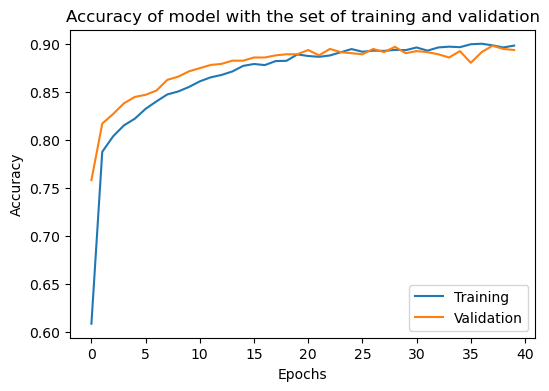

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [58]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=model.predict(X_test,verbose=0).round()

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       866
           1       0.92      0.83      0.87      1062

    accuracy                           0.87      1928
   macro avg       0.87      0.87      0.87      1928
weighted avg       0.87      0.87      0.87      1928



In [59]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.round()
    return y_pred

classifier = estimator(model,[0,1])

61/61 [==============================] - 0s 2ms/step


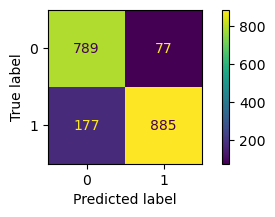

In [60]:
plot_confusion_matrix(classifier,X_test,y_test);